# Визуальное представление векторных баз

In [ ]:
!pip  install openai==0.27.8 faiss-cpu==1.7.4 langchain==0.0.231

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
import getpass
import os
import openai
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

In [ ]:
# закачаем векторные базы знаний в рабочий каталог из GitHub
!git clone -b develop https://github.com/TasksAndreySorokin/KIA-GPT1.git
!cp -r /content/KIA-GPT1/knowledge/faiss_router /content/faiss_router
!rm -r /content/KIA-GPT1

Cloning into 'KIA-GPT1'...
remote: Enumerating objects: 1678, done.
remote: Counting objects: 100% (693/693), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 1678 (delta 569), reused 538 (delta 482), pack-reused 985
Receiving objects: 100% (1678/1678), 37.57 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (918/918), done.
Updating files: 100% (163/163), done.


In [ ]:
# удалим папку parts, т.к. там всего один чанк и он вносит ошибку
!rm -r /content/faiss_router/faiss_parts

In [ ]:
openai_key = getpass.getpass("OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

OpenAI API Key:··········


In [ ]:
vb_tech = FAISS.load_local('/content/faiss_router/faiss_technology', OpenAIEmbeddings())
vb_acc = FAISS.load_local('/content/faiss_router/faiss_accessories', OpenAIEmbeddings())

In [ ]:
vb_path = '/content/faiss_router/'

# Получить список имен папок в заданной папке
vb_names = [name for name in os.listdir(vb_path) if os.path.isdir(os.path.join(vb_path, name))]

print(vb_names)
print(len(vb_names))

['faiss_warranty', 'faiss_sales', 'faiss_accessories', 'faiss_oils', 'faiss_models', 'faiss_technology', 'faiss_promotions', 'faiss_service', 'faiss_apps', 'faiss_tech']
10


In [ ]:
# создадим список названий векторных баз по разделам
list_names = [f'vb_{vb.split("_")[1]}' for vb in vb_names]

In [ ]:
print(list_names)
print(len(list_names))

['vb_warranty', 'vb_sales', 'vb_accessories', 'vb_oils', 'vb_models', 'vb_technology', 'vb_promotions', 'vb_service', 'vb_apps', 'vb_tech']
10


In [ ]:
# создадим список из векторных каждого раздела
vb_list = [FAISS.load_local(f'/content/faiss_router/{vb}', OpenAIEmbeddings()) for vb in vb_names]
print(vb_list)

[<langchain.vectorstores.faiss.FAISS object at 0x799529a52980>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52860>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52200>, <langchain.vectorstores.faiss.FAISS object at 0x799529a525f0>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52470>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52710>, <langchain.vectorstores.faiss.FAISS object at 0x799529a520e0>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52a40>, <langchain.vectorstores.faiss.FAISS object at 0x799529a52350>, <langchain.vectorstores.faiss.FAISS object at 0x799529a51f30>]


In [ ]:
# создадим список эмбеддингов для каждого чанка по разделам
emb_list = [[list(vb.index.reconstruct_n(idx, 1)[0]) for idx in range(len(vb.docstore._dict))]for vb in vb_list]
# преобразуем в список массивов по разделам
np_list = [np.array([embeds for embeds in emb]) for emb in emb_list]

In [ ]:
print([arr.shape for arr in np_list])

[(75, 1536), (416, 1536), (211, 1536), (12, 1536), (296, 1536), (40, 1536), (7, 1536), (531, 1536), (147, 1536), (320, 1536)]


In [ ]:
# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Выполним преобразование t-SNE в двух мерный массив
tsne = TSNE(n_components=2, perplexity=6, random_state=42)
np_tsne_list = [tsne.fit_transform(arr) for arr in np_list]

In [ ]:
print([np_tsne.shape for np_tsne in np_tsne_list])

[(75, 2), (416, 2), (211, 2), (12, 2), (296, 2), (40, 2), (7, 2), (531, 2), (147, 2), (320, 2)]


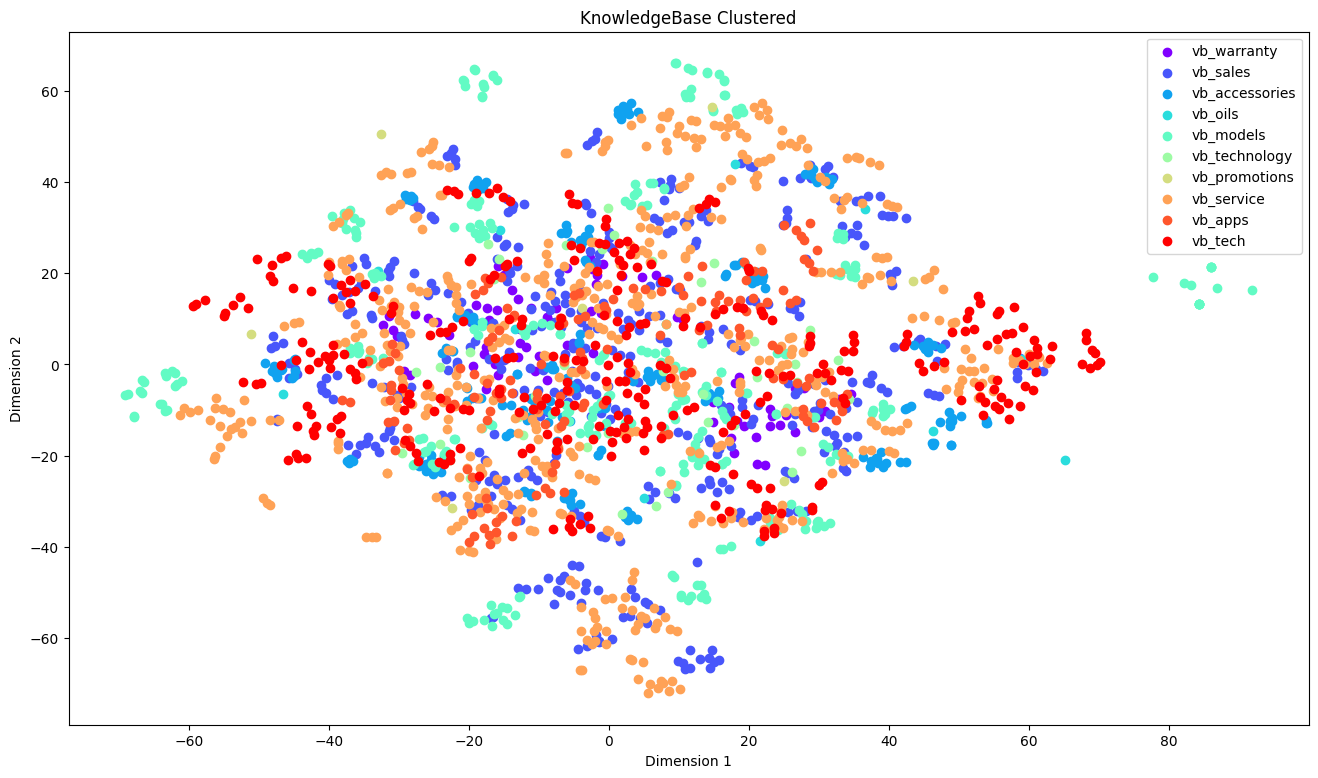

In [ ]:
# построим график
plt.figure(figsize=(16, 9))   # размер полотна в дюймах, (x, y)

# Получаем количество элементов в np_tsne_list
num_elements = len(np_tsne_list)

# Генерируем цвета для каждого элемента
colors = plt.cm.rainbow(np.linspace(0, 1, num_elements))

# Создаем график scatter с указанием цветов для каждого элемента
for i, np_tsne in enumerate(np_tsne_list):
    plt.scatter(np_tsne[:, 0], np_tsne[:, 1], label=list_names[i], c=[colors[i]])


plt.xlabel('Dimension 1')     # названия осей
plt.ylabel('Dimension 2')
plt.title('KnowledgeBase Clustered')      # названия графика
plt.legend()                                  # "легенды" - legend()
# выведем график на экран
plt.show()